 <h4 style='color:green;font-size:20px'>  Neural Network <h4>

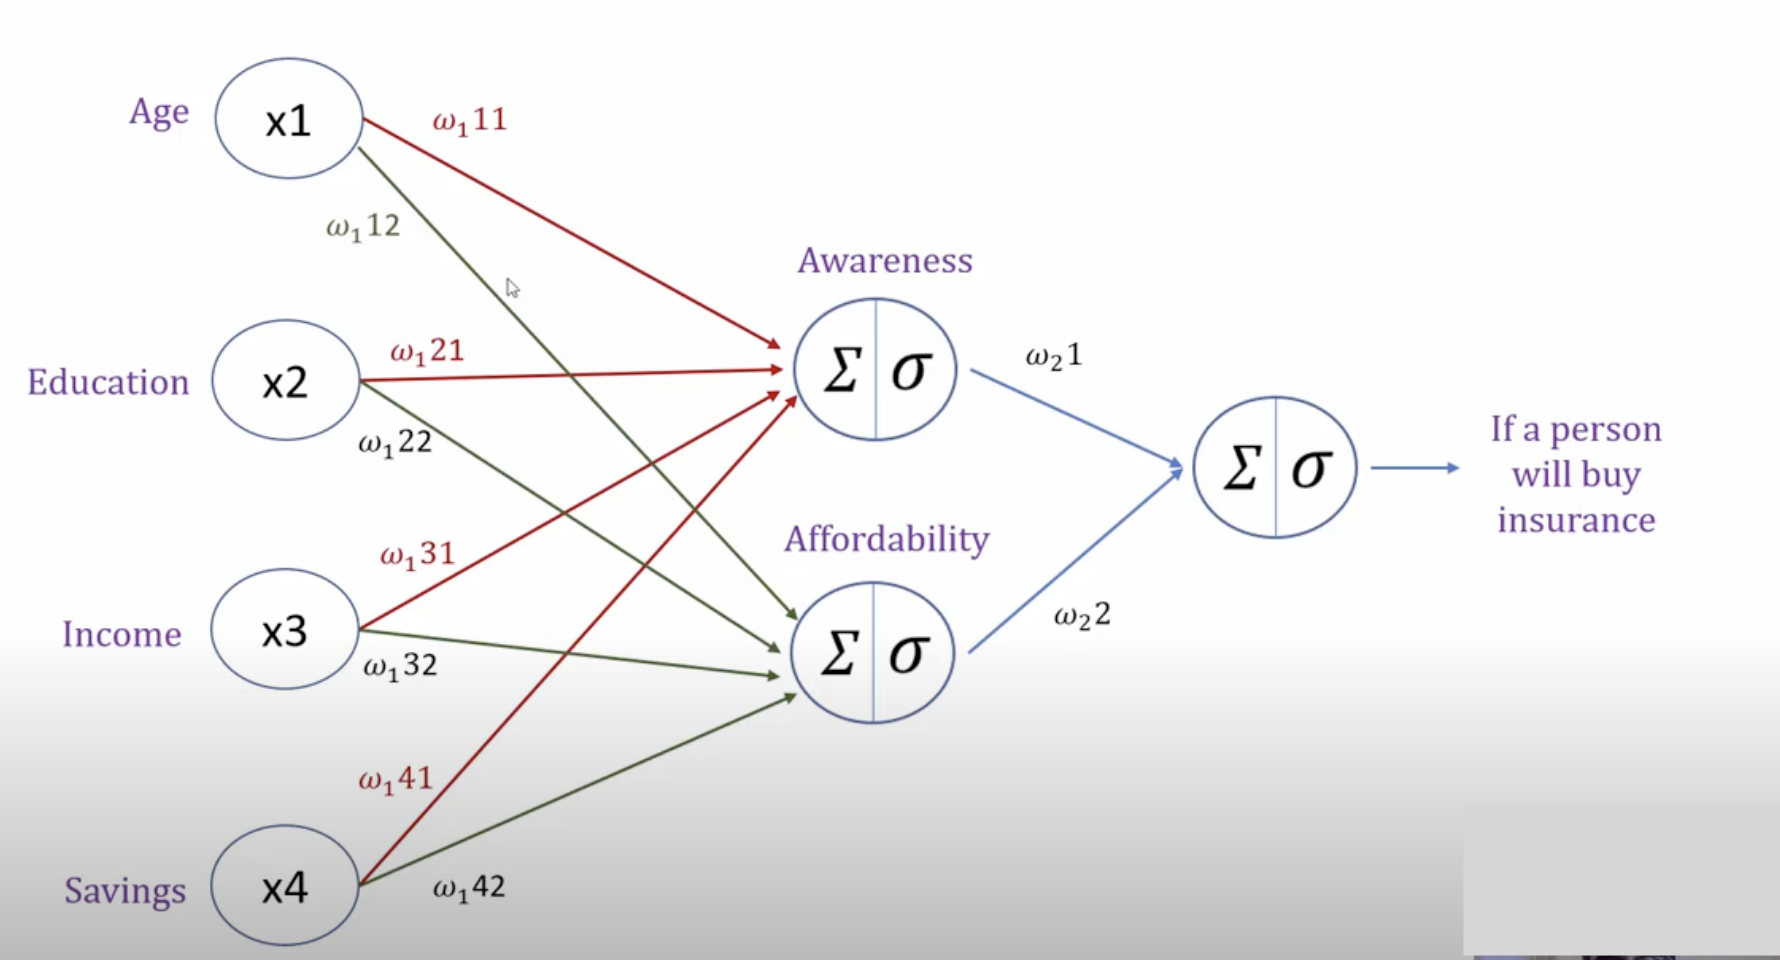

In [2]:
# import tensorflow as tf
# from tensorflow import keras

# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,),activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])
# model.compile(
#     optimizer='adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# ) 
# model.fit(x_train,y_train, epochs=5)

 <h4 style='color:blue;font-size:20px'>  Dropout for Overfitting <h4>

In [ ]:
# If we have too many epochs it will make overfitting


In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
#     keras.layers.Dropout(0.2)    #drop 20% neurons
#     keras.layers.Dense(10,activation='sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# ) 

# model.fit(x_train,y_train, epochs=5)

 <h4 style='color:blue;font-size:20px'>  Activation Functions <h4>

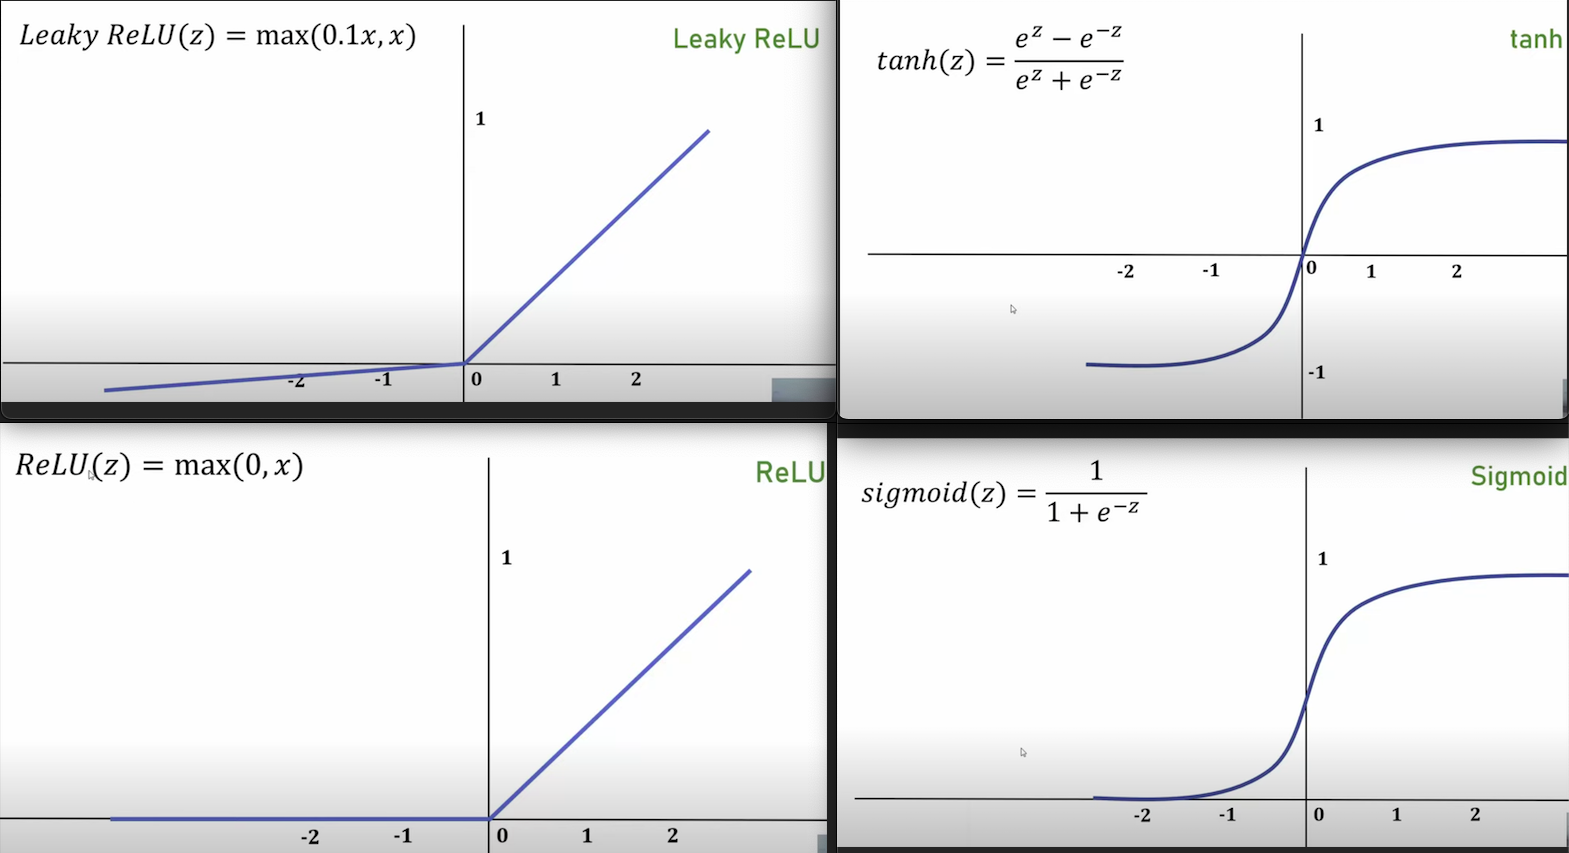

In [3]:
# Use sigmoid in output layer and all other places use tanh

In [4]:
# for hidden layers if do not know what to use just use relu

In [25]:
# Better to use softmax than sigmoid and leakyrelu than relu because those have vanishing gradient

 <h4 style='color:blue;font-size:20px'>  Loss | Cost Functions <h4>

In [5]:
# Mean absolute error : (truth - Pred)
# Mean squared error : (truth - Pred)**2
# Binary cross entropy : -np.mean(truth*np.log(Pred)) + (1-truth)*np.log(Pred)

In [ ]:
# if y_train is 1,0 : use binary cross entropy
# if y_train is 1,2,3,4 (1 column and categorical) : use sparese categorical cross entropy
# if y_train has multiple columns as categories : use categorical cross entropy

 <h4 style='color:blue;font-size:20px'>  Gradient Descent <h4>

In [6]:
import pandas as pd
df = pd.read_csv('./data/insurance_data.csv')
df.head()

age  affordibility  bought_insurance
0   22              1                 0
1   25              0                 0
2   47              1                 1
3   52              0                 0
4   46              1                 1

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['age','affordibility']], df['bought_insurance'], test_size=0.2, random_state=5)

In [13]:
x_train_scaled = x_train
x_train_scaled['age'] = x_train_scaled['age']/100
x_test_scaled = x_test
x_test_scaled['age'] = x_test_scaled['age']/100

In [20]:
def Sigmoid(x):
    import math
    return 1/(1+math.exp(-x))

In [21]:
def log_loss(y_true,y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean((y_true*np.log(y_predicted_new))+(1- y_true)*np.log(1-y_predicted_new))

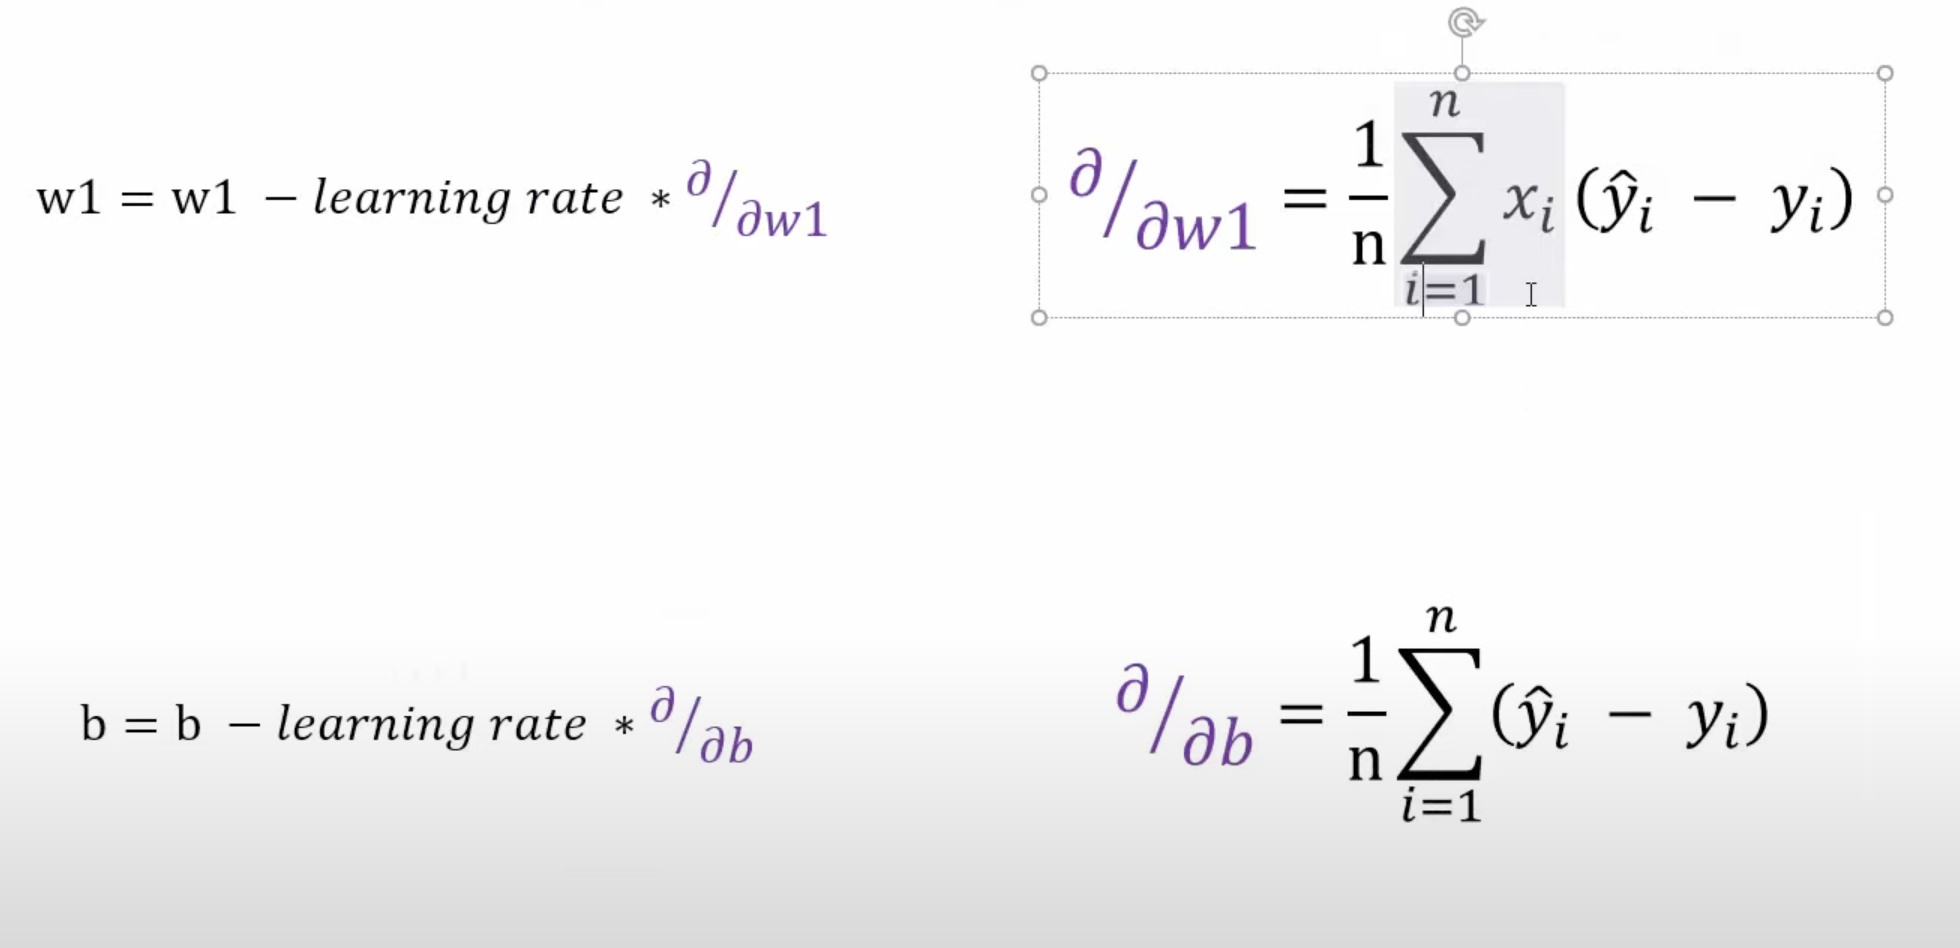

In [22]:
def gradient_descent(age, affordability, y_true, epochs, loss_threshold):
    # we are going to find w1,w2 and bias
    w1=w2=1
    bias=0
    rate = 0.5
    n = len(age)
    
    for i in range(epochs):
        weighted_sum = w1*age + w2*affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true,y_predicted)
        w1derivative = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2derivative = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
        bias_derivative = np.mean(y_predicted-y_true)
        
        w1 = w1-rate*w1derivative
        w2 = w2 - rate*w2derivative
        bias = bias - rate * bias_derivative
        
        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        
        if loss<=loss_threshold:
            break
    return w1,w2,bias

In [23]:
# NN from scratch
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
    
    def fit(self, x, y, epochs, loss_threshold):
        self.w1, self.w2, self.bias =  self.gradient_descent(x['age'], x['affordibility'], y, epochs, loss_threshold)
    
    def predict(self, x):
        weighted_sum = self.w1*x['age'] + self.w2*x['affordibility'] + self.bias
        return self.sigmoid_numpy(weighted_sum)
        
    
    def sigmoid_numpy(self, x):
        import numpy as np
        return 1/(1+np.exp(-x))
    
    def gradient_descent(self, age, affordibility, y_true, epochs, loss_threshold):
        # we are going to find w1,w2 and bias
        w1=w2=1
        bias=0
        rate = 0.5
        n = len(age)
    
        for i in range(epochs):
            weighted_sum = w1*age + w2*affordibility + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true,y_predicted)
            w1derivative = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
            w2derivative = (1/n)*np.dot(np.transpose(affordibility),(y_predicted-y_true))
            bias_derivative = np.mean(y_predicted-y_true)

            w1 = w1-rate*w1derivative
            w2 = w2 - rate*w2derivative
            bias = bias - rate * bias_derivative

            print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_threshold:
                break
        return w1,w2,bias

In [ ]:
# Batch Gradient Descent : Whole data set and change weights
# Mini Batch Gradient descent
# Stochastic Gradient Descent : 1 row and change weights

 <h4 style='color:blue;font-size:20px'>  GPU Usage <h4>

In [24]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# with tf.device('/GPU:0')
#     model.fit(x,y,epochs=5)

 <h4 style='color:blue;font-size:20px'> Handling Imbalanced data  <h4>

In [26]:
# # Under sampling

# # Divide by class
# df_class_0 = df3[df2['Churn'] == 0]
# df_class_1 = df3[df2['Churn'] == 1]

# # Undersample 0-class and concat the DataFrames of both class
# df_class_0_under = df_class_0.sample(count_class_1)
# df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [27]:
# # Oversample 1-class and concat the DataFrames of both classes

# df_class_1_over = df_class_1.sample(count_class_0, replace=True)
# df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [28]:
# Over sampling using SMOTE

# from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = sm.fit_resample(x, y)

In [29]:
# # Ensemble method

# def get_train_batch(df_majority, df_minority, start, end):
#     df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

#     X_train = df_train.drop('Churn', axis='columns')
#     y_train = df_train.Churn
#     return X_train, y_train  

# X_train, y_train = get_train_batch(df4_class0, df4_class1, 0, 1495)
# y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

# X_train, y_train = get_train_batch(df4_class0, df4_class1, 2990, 4130)
# y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

 <h4 style='color:green;font-size:20px'>  Convolution Neural Network <h4>

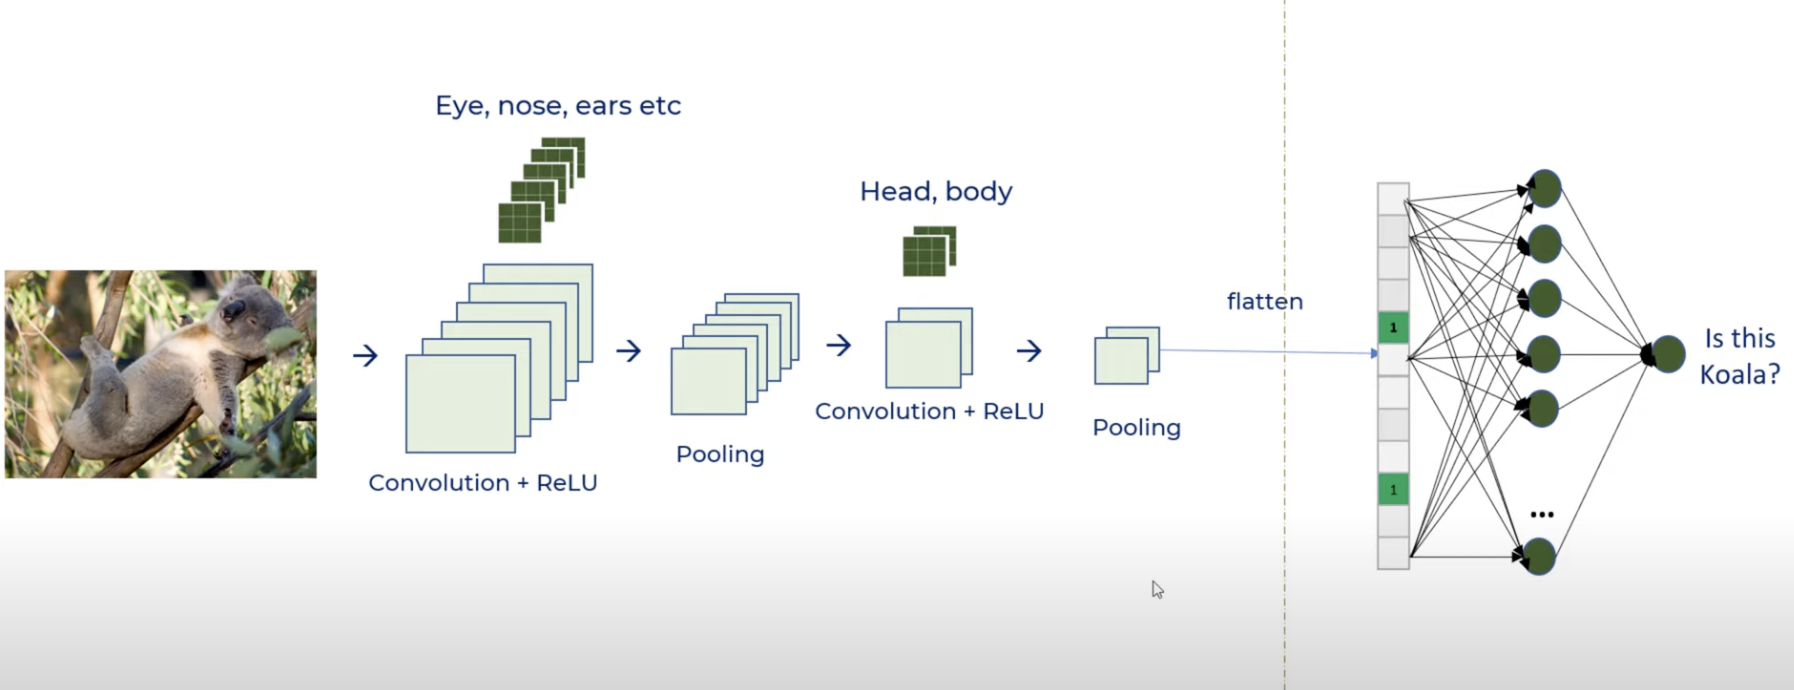

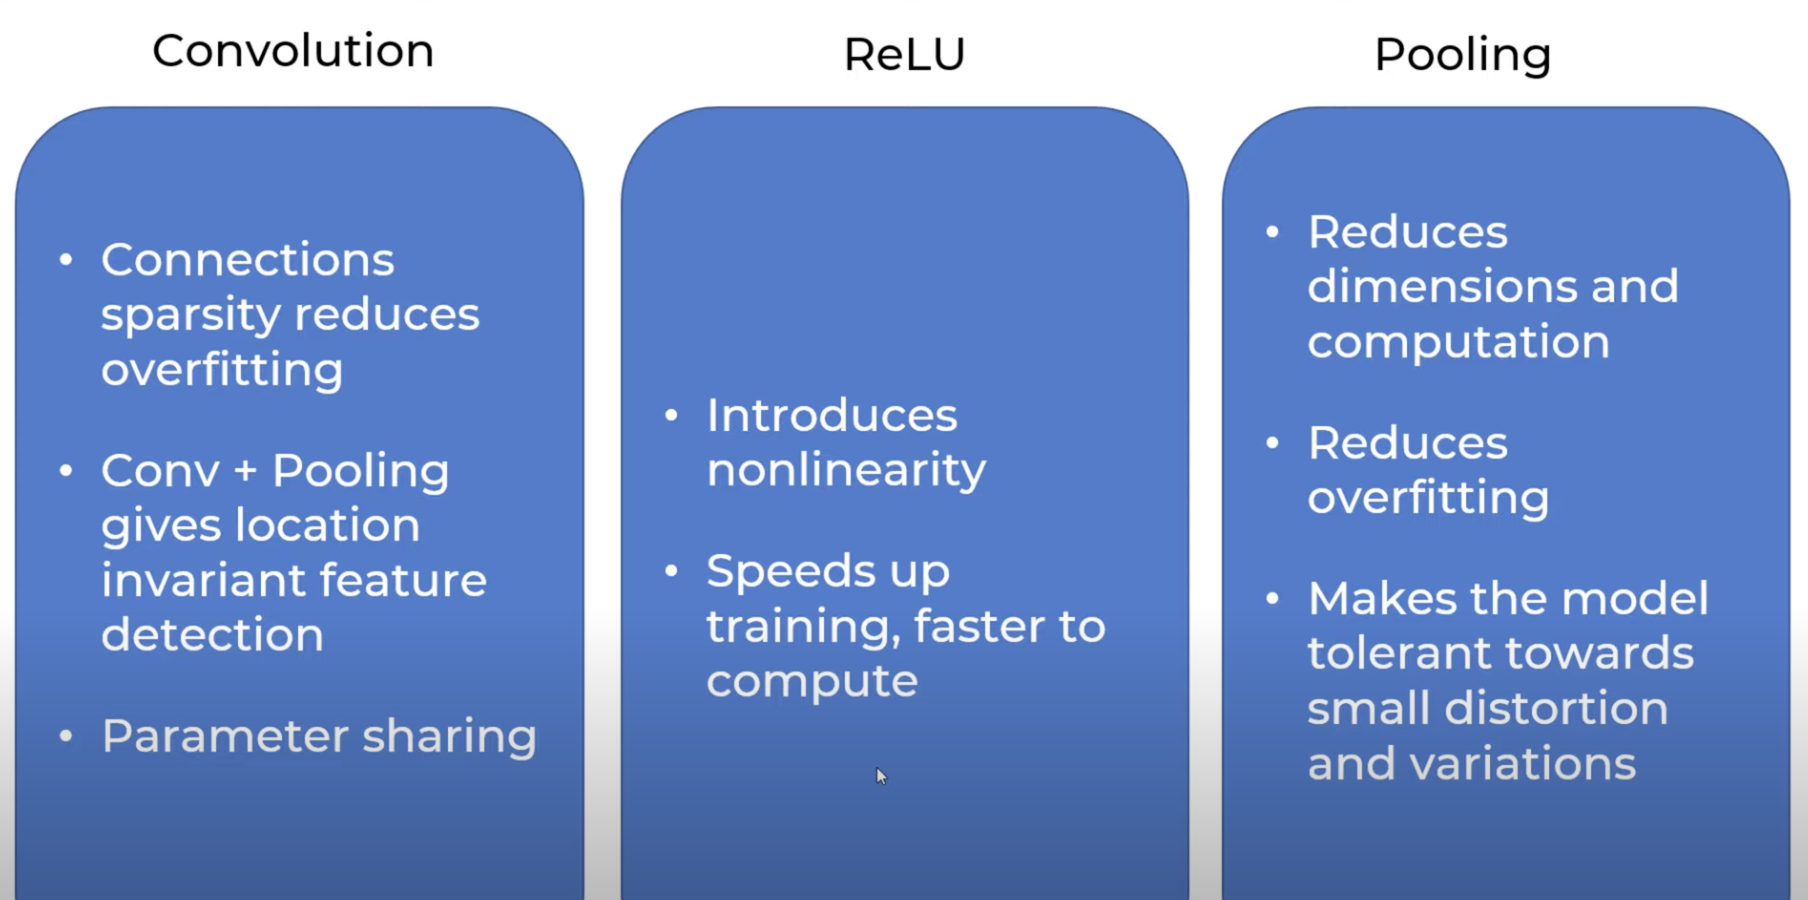

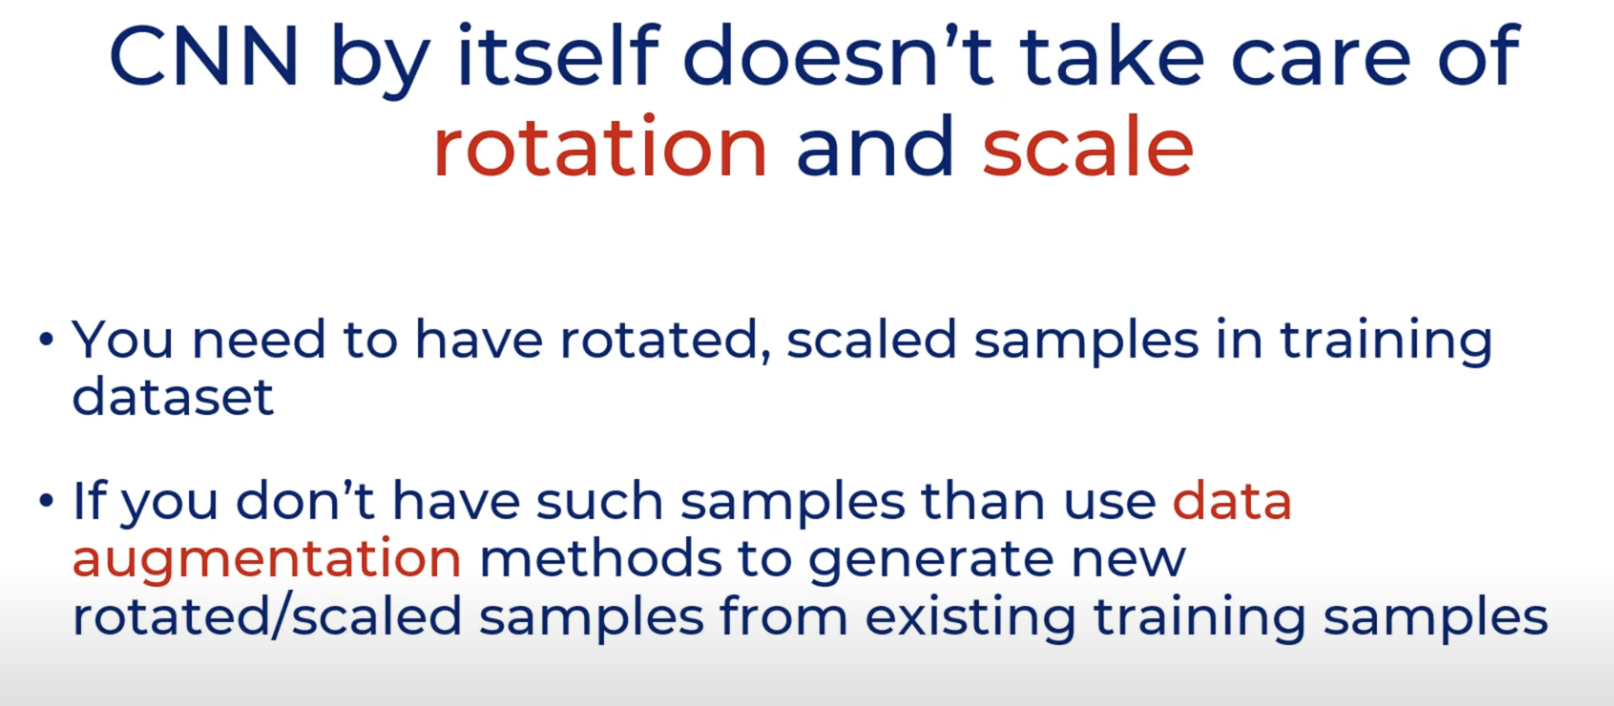

In [1]:
# from tensorflow import keras

# cnn = keras.Sequential([
#     # cnn
#     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
#     keras.layers.MaxPooling2D((2,2)),
#     keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPooling2D((2,2)),
    
#     # dense
#     keras.layers.Flatten(),
#     keras.layers.Dense(60, activation='relu'),
#     keras.layers.Dense(10,activation='softmax')
# ])
# cnn.compile(
#     optimizer='adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# ) 
# cnn.fit(x_train,y_train, epochs=5)

### Data augmentation

In [4]:
from tensorflow.keras import datasets, layers, models
data_augmantation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180,180,3))
])

In [5]:
# model = keras.Sequential([
#     # data augmentation
#     data_augmantation,
    
#     # 16 filters 3x3 window
#     keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
#     keras.layers.Dropout(0.2),
    
#     # nn
#     keras.layers.Flatten(),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(5, activation='sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )


# model.fit(x_train_scaled, y_train, epochs = 20)

 <h4 style='color:green;font-size:20px'>  Apply Pretrained Models : Google <h4>

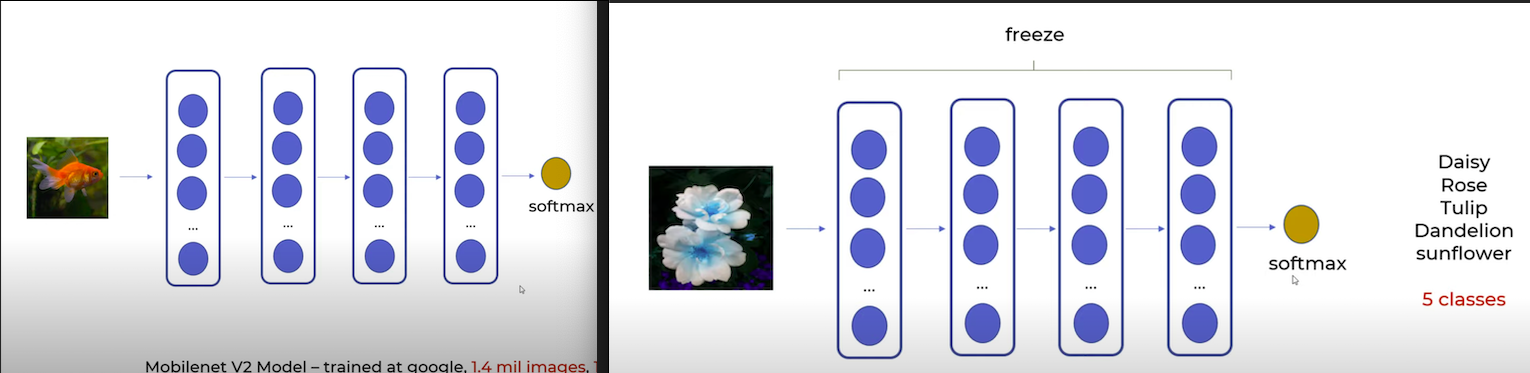

In [6]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# # This model is the one we can change according to our data
# model = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=(224,224,3),
#                    trainable=False),  # Can be True, see below.
#     tf.keras.layers.Dense(5, activation='softmax')
# ])
# model.summary()

In [1]:
# model.compile(
#     optimizer='adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# model.fit(x_train_scaled, y_train, epochs = 5)

 <h4 style='color:green;font-size:20px'>  Object Detection <h4>

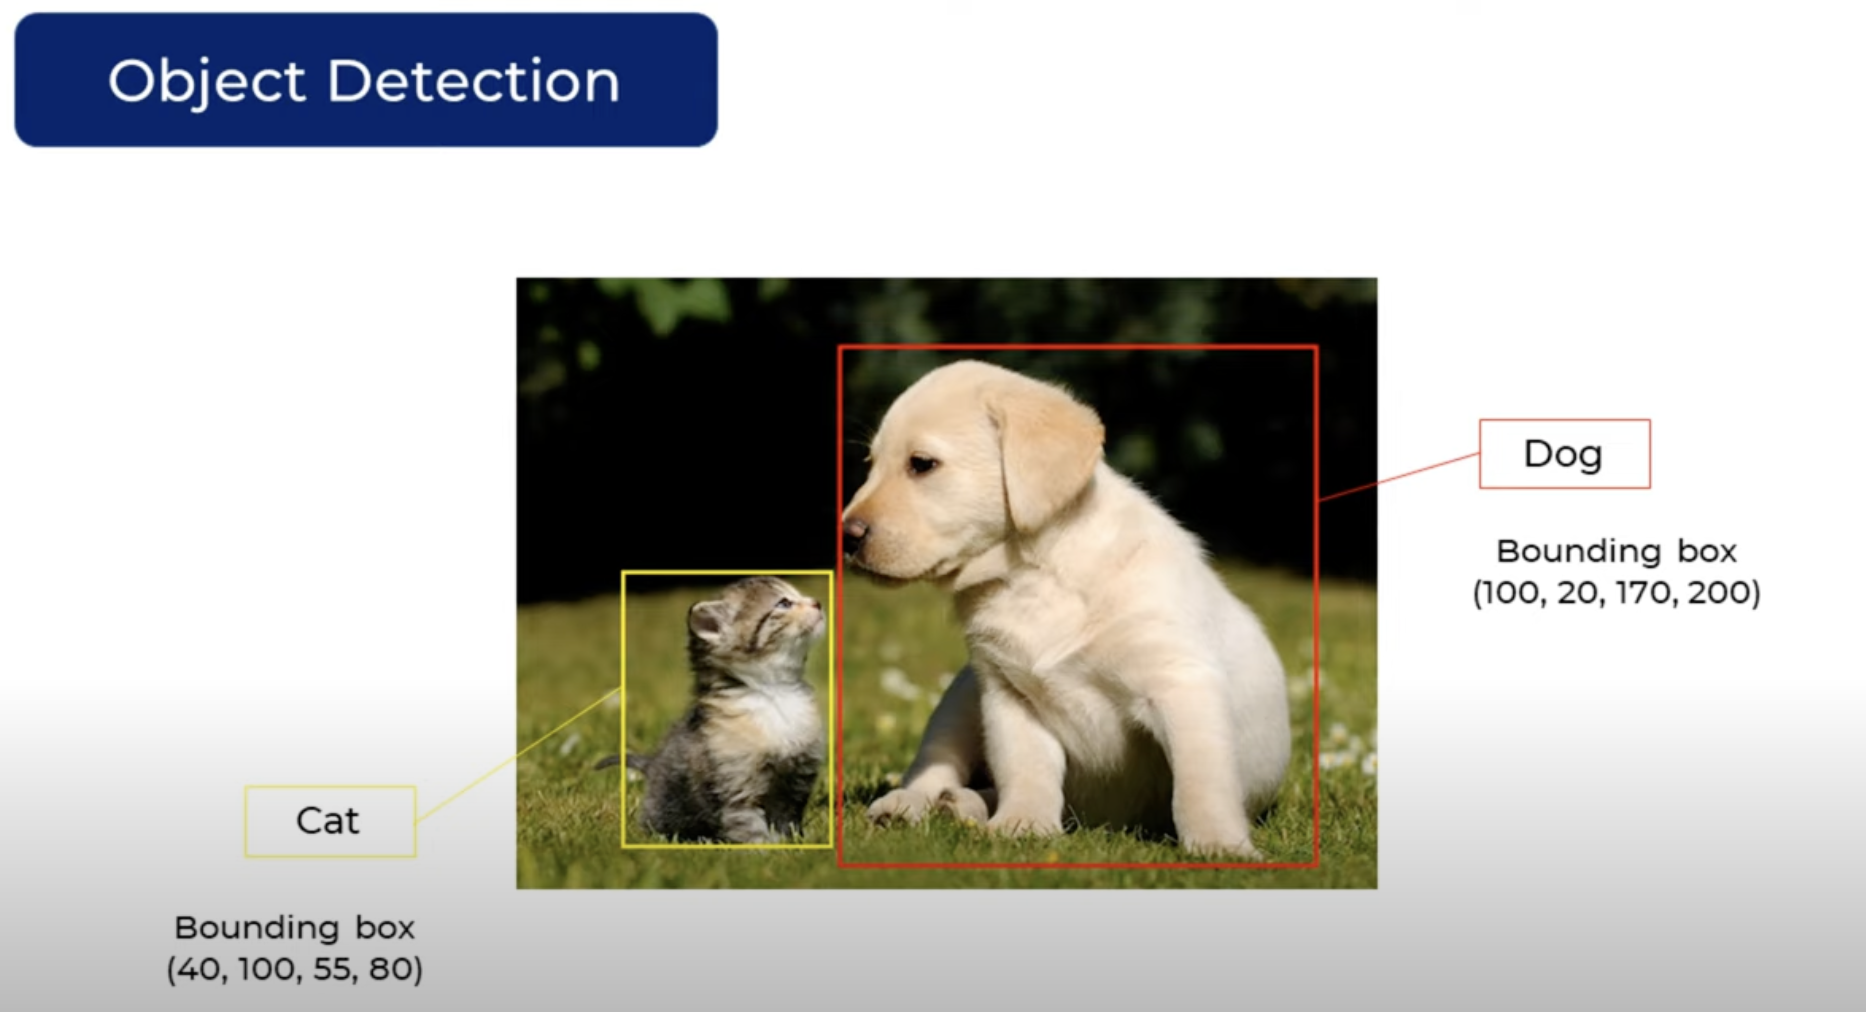